# Association Rules(my_movies)

###Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots

In [2]:
!pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [4]:
data=pd.read_csv("my_movies.csv")
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
x=(data.dtypes=='object')
object_cols=list(x[x].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [6]:
num_data=data.iloc[:,5:15]
num_data.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


## apriori algorithm

In [7]:
frequent_itemsets=apriori(num_data,min_support=0.15,use_colnames=True)
print(frequent_itemsets.head())

   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
frequent_itemsets.sort_values("support",ascending=False).head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
10,0.6,"(Patriot, Gladiator)"
7,0.5,"(Sixth Sense, Gladiator)"


In [9]:
frequent_itemsets.sort_values("support",ascending=False).shape

(13, 2)

In [10]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
print(rules.head())

     antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2   (Green Mile)  (Sixth Sense)                 0.2                 0.6   
3      (Patriot)    (Gladiator)                 0.6                 0.7   
4    (Gladiator)      (Patriot)                 0.7                 0.6   

   support  confidence      lift  leverage  conviction  
0      0.5    0.833333  1.190476      0.08         1.8  
1      0.5    0.714286  1.190476      0.08         1.4  
2      0.2    1.000000  1.666667      0.08         inf  
3      0.6    1.000000  1.428571      0.18         inf  
4      0.6    0.857143  1.428571      0.18         2.8  


In [15]:
rules[(rules.support>0.015) & (rules.confidence>0.4)].sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1,LOTR1,LOTR2
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1,LOTR2,LOTR1
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,1,Green Mile,Sixth Sense
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1,Gladiator,Patriot
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,1,Patriot,Gladiator
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2,"Patriot,Sixth Sense",Gladiator
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2,"Sixth Sense,Gladiator",Patriot
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,1,Sixth Sense,Gladiator
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,1,Gladiator,Sixth Sense


In [16]:
rules['lhs items']=rules['antecedents'].apply(lambda x:len(x))
rules[rules['lhs items']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,2,"Patriot,Sixth Sense",Gladiator
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.8,1.333333,0.10,2.0,2,"Sixth Sense,Gladiator",Patriot


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Patriot,Sixth Sense'), Text(0, 1.5, 'Sixth Sense,Gladiator')])

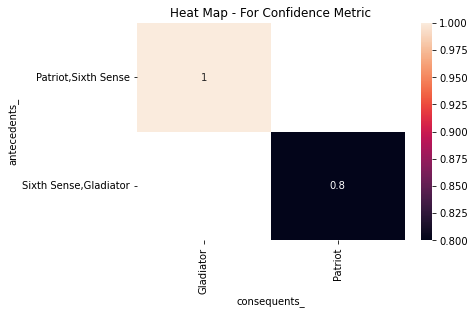

In [17]:
rules['antecedents_']=rules['antecedents'].apply(lambda a: ','.join(a))
rules['consequents_']=rules['consequents'].apply(lambda a: ','.join(a))
pivot=rules[rules['lhs items']>1].pivot(index='antecedents_',
             columns='consequents_',values='confidence')
#generate heatmaps
sns.heatmap(pivot,annot=True)
plt.title('Heat Map - For Confidence Metric')
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [18]:
rules_li=association_rules(frequent_itemsets,metric="lift",min_threshold=0.7)

In [19]:
print(rules_li.shape)

(16, 9)


In [20]:
rules_li['lhs items']=rules_li['antecedents'].apply(lambda x:len(x))
rules_li[rules_li['lhs items']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
12,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
11,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Patriot,Gladiator'),
  Text(0, 1.5, 'Patriot,Sixth Sense'),
  Text(0, 2.5, 'Sixth Sense,Gladiator')])

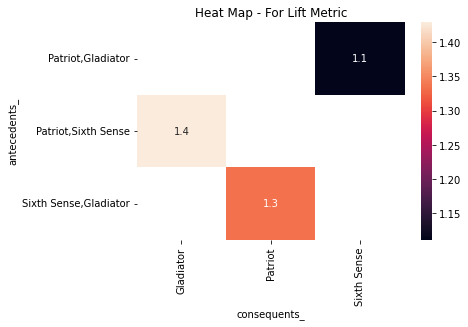

In [21]:
rules_li['antecedents_']=rules_li['antecedents'].apply(lambda a: ','.join(a))
rules_li['consequents_']=rules_li['consequents'].apply(lambda a: ','.join(a))
pivot=rules_li[rules_li['lhs items']>1].pivot(index='antecedents_',
             columns='consequents_',values='lift')
#generate heatmaps
sns.heatmap(pivot,annot=True)
plt.title('Heat Map - For Lift Metric')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
